In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from ipynb.fs.full.main_functions import Lasso_regression
from ipynb.fs.full.main_functions import iterateLasso
import matplotlib.pyplot as plt

In [2]:
data_full = pd.read_csv('HB_predittori2.csv')
data_y = pd.read_csv('tfce.csv')
data_full = pd.concat([data_full, data_y], axis=1)

data_full = data_full.dropna().reset_index()
data_full = data_full.drop(columns = ["index", "Unnamed: 0", "ResponseId"])

data_y1 = data_full[["TFCE"]]
data_y2 = data_full[["Yoon"]]
data_y3 = data_full[["Barton"]]
data_y4 = data_full[["Corr"]]



#define predictor and response variables
X = data_full[["dx/sx", "Cons/prog", "Ind/col", "Flame", "Agreeableness", "Conscientiousness", "Em Stability", "Extroversion", "Openness", "Social Use"]]
X_corr = data_full[["dx/sx", "Cons/prog", "Ind/col", "Flame", "Agreeableness", "Conscientiousness", "Em Stability", "Extroversion", "Openness", "Social Use"]]


In [3]:
data_full.head()
data_full.shape

print(data_full.describe())
data_full.isna().sum()

             Yoon      Barton        Corr       dx/sx   Cons/prog     Ind/col  \
count  162.000000  162.000000  162.000000  162.000000  162.000000  162.000000   
mean     0.359288   28.001029    0.315448   68.598765   12.969136   30.246914   
std      0.178298   15.957733    0.460488   26.921201   15.988514   23.909005   
min      0.041892    3.500000   -0.911595    0.000000    0.000000    0.000000   
25%      0.232787   16.541667   -0.110077   51.000000    2.000000    8.000000   
50%      0.350102   25.833333    0.431006   71.000000    5.500000   26.500000   
75%      0.442160   34.708333    0.696215   93.000000   20.000000   48.750000   
max      0.982807   93.333333    0.977288  100.000000   83.000000  100.000000   

            Flame  Agreeableness  Conscientiousness  Em Stability  \
count  162.000000     162.000000         162.000000    162.000000   
mean    31.648148      50.904321          54.882716     41.129630   
std     27.212865      20.838743          19.457594     24.8538

Yoon                 0
Barton               0
Name                 0
Corr                 0
dx/sx                0
Cons/prog            0
Ind/col              0
Flame                0
Agreeableness        0
Conscientiousness    0
Em Stability         0
Extroversion         0
Openness             0
Social Use           0
TFCE                 0
dtype: int64

Best Score: -0.7857574971870734
Best Hyperparameters: {'alpha': 0.1, 'fit_intercept': False, 'positive': True, 'selection': 'cyclic'}
-0.014088618191166802
0.9112421745852715
dx/sx                0.000000
Cons/prog            0.000000
Ind/col              0.000000
Flame                0.054923
Agreeableness        0.000000
Conscientiousness    0.000000
Em Stability         0.005107
Extroversion         0.000000
Openness             0.000000
Social Use           0.000000
dtype: float64
Best Score: -0.7615328084017975
Best Hyperparameters: {'alpha': 0.1, 'fit_intercept': False, 'positive': False, 'selection': 'random'}
-0.017867872124656792
1.1793943859225615
dx/sx                0.000000
Cons/prog            0.000000
Ind/col             -0.000000
Flame                0.006945
Agreeableness        0.000000
Conscientiousness   -0.024495
Em Stability         0.000000
Extroversion         0.000000
Openness            -0.000000
Social Use           0.000000
dtype: float64
Best Score: -0.7436

<BarContainer object of 10 artists>

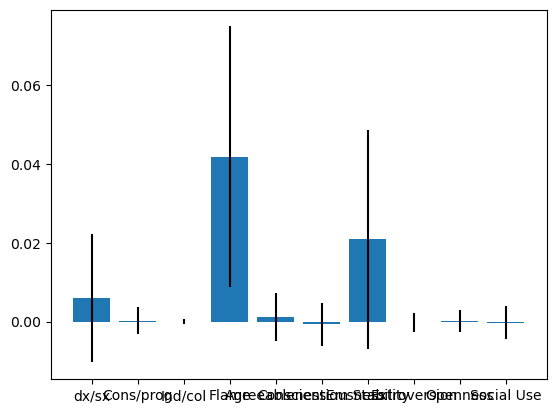

In [6]:
r2, RMSE, final_coeffs, stdr2, stdRMSE, stdCoeffs = iterateLasso(1000, 10, X, data_y2)

plt.bar(X.columns, final_coeffs, yerr=stdCoeffs)


In [7]:
np.savetxt('lasso_coefficients_YOON.csv', final_coeffs, delimiter=',')
np.savetxt('lasso_coefficients_stdYOON.csv', stdCoeffs, delimiter=',')

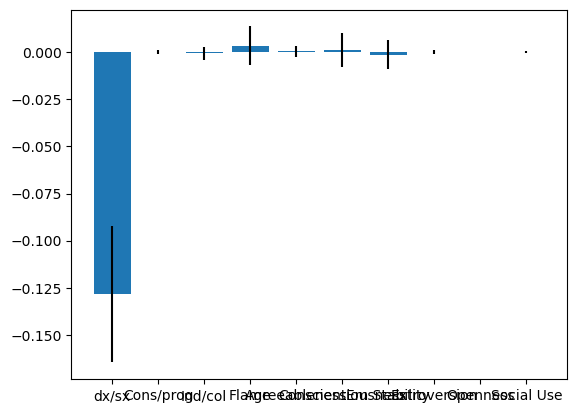

In [33]:
stdv = np.std(final_coeffs, axis = 0)

plt.bar(X.columns, np.mean(final_coeffs, axis = 0), yerr = stdv)

np.savetxt("lasso_coeffs.csv", np.mean(final_coeffs, axis = 0), delimiter=",")
np.savetxt("lasso_stdv.csv", stdv, delimiter=",")



Best Score: -0.7596411382224699
Best Hyperparameters: {'alpha': 0.1, 'fit_intercept': False, 'positive': True, 'selection': 'cyclic'}
0.01778347456810292
0.8453714975817535
dx/sx                0.000000
Cons/prog            0.000000
Ind/col              0.000000
Flame                0.028754
Agreeableness        0.000000
Conscientiousness    0.000000
Em Stability         0.000000
Extroversion         0.000000
Openness             0.000000
Social Use           0.000000
dtype: float64
Best Score: -0.7708834908216169
Best Hyperparameters: {'alpha': 0.1, 'fit_intercept': False, 'positive': True, 'selection': 'cyclic'}
0.01882268106142282
0.8903390160039052
dx/sx                0.000000
Cons/prog            0.000000
Ind/col              0.000000
Flame                0.040667
Agreeableness        0.000000
Conscientiousness    0.000000
Em Stability         0.000000
Extroversion         0.000000
Openness             0.000000
Social Use           0.000000
dtype: float64
Best Score: -0.728431363

<BarContainer object of 10 artists>

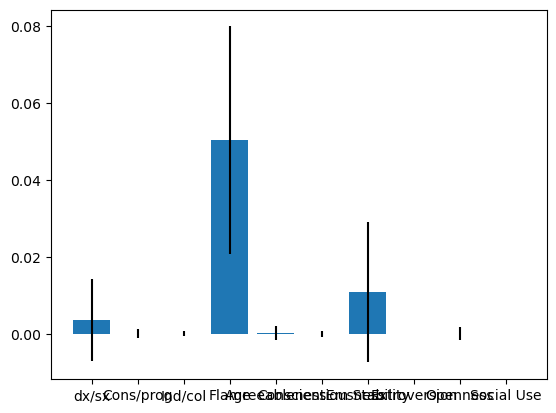

In [8]:
r2, RMSE, final_coeffs, stdr2, stdRMSE, stdCoeffs = iterateLasso(1000, 10, X, data_y3)

plt.bar(X.columns, final_coeffs, yerr=stdCoeffs)

Best Score: -0.8837050583936561
Best Hyperparameters: {'alpha': 0.1, 'fit_intercept': False, 'positive': True, 'selection': 'random'}
-0.016347061232949045
0.8847980188317988
dx/sx                0.0
Cons/prog            0.0
Ind/col              0.0
Flame                0.0
Agreeableness        0.0
Conscientiousness    0.0
Em Stability         0.0
Extroversion         0.0
Openness             0.0
Social Use           0.0
dtype: float64
Best Score: -0.8426582332034549
Best Hyperparameters: {'alpha': 0.1, 'fit_intercept': False, 'positive': True, 'selection': 'cyclic'}
-0.008730283517547788
1.09704400922774
dx/sx                0.000000
Cons/prog            0.000000
Ind/col              0.000000
Flame                0.000000
Agreeableness        0.014645
Conscientiousness    0.002902
Em Stability         0.000000
Extroversion         0.000000
Openness             0.000000
Social Use           0.018934
dtype: float64
Best Score: -0.8472842812446254
Best Hyperparameters: {'alpha': 0.07, 'f

<BarContainer object of 10 artists>

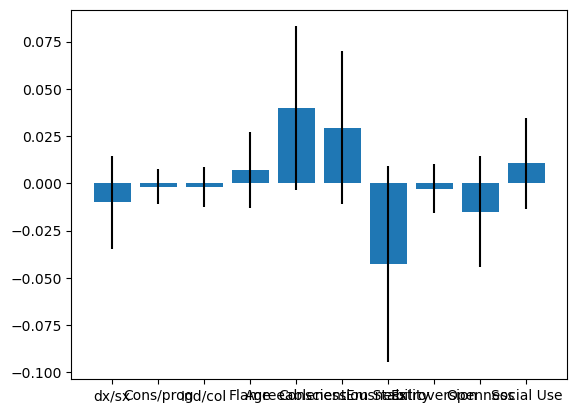

In [9]:
r2, RMSE, final_coeffs, stdr2, stdRMSE, stdCoeffs = iterateLasso(1000, 10, X, data_y4)

plt.bar(X.columns, final_coeffs, yerr=stdCoeffs)

In [10]:
np.savetxt('lasso_coefficients_CORR.csv', final_coeffs, delimiter=',')
np.savetxt('lasso_coefficients_stdCORR.csv', stdCoeffs, delimiter=',')